In [2]:
import pandas as pd
import missingno as ms
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# 데이터 불러오기

In [3]:
df_new = pd.read_excel("df_model_new.xlsx")
df_origin = pd.read_excel("df_model_origin.xlsx")

In [4]:
df = df_new.copy()
df.head(5)

,review_score,low_review_score_rate,year_month,seller_id,rating,product_category_upper,seller_state,seles_by_OrderNumber,sales,order_nb,delivery_delay_new,delivery_periods_new,delivery_preparation_new,error_rate_based_on_CI,error_rate_based_on_estimated,rate_canceled,canceled_rate_rolling,error_rate_based_on_CI_rolling,error_rate_based_on_estimated_rolling
0,4.200000,20.0,2017-01-01,004c9cd9d87a3c30c522c48c4fc07416,0,home_living,SP,140.574000,702.87,5.0,-19.000000,16.4,0.400000,20.0,20.0,0.0,NaN,NaN,NaN
1,5.000000,0.0,2017-01-01,014c0679dd340a0e338872e7ec85666a,0,home_living,MG,128.200000,128.20,1.0,-64.000000,11.0,1.000000,0.0,0.0,0.0,NaN,NaN,NaN
2,5.000000,0.0,2017-01-01,01cf7e3d21494c41fb86034f2e714fa1,0,home_appliances,PR,227.425000,909.70,4.0,118.000000,154.5,2.000000,25.0,25.0,0.0,NaN,NaN,NaN
3,4.000000,50.0,2017-01-01,01cf7e3d21494c41fb86034f2e714fa1,0,stationery,PR,91.840000,183.68,2.0,-19.500000,6.5,1.000000,0.0,0.0,0.0,NaN,NaN,NaN
4,4.666667,0.0,2017-01-01,054694fa03fe82cec4b7551487331d74,0,home_appliances,SP,449.546667,1348.64,3.0,-27.666667,14.0,5.333333,0.0,0.0,0.0,NaN,NaN,NaN


# 데이터 확인

## 결측치 확인

<AxesSubplot:>

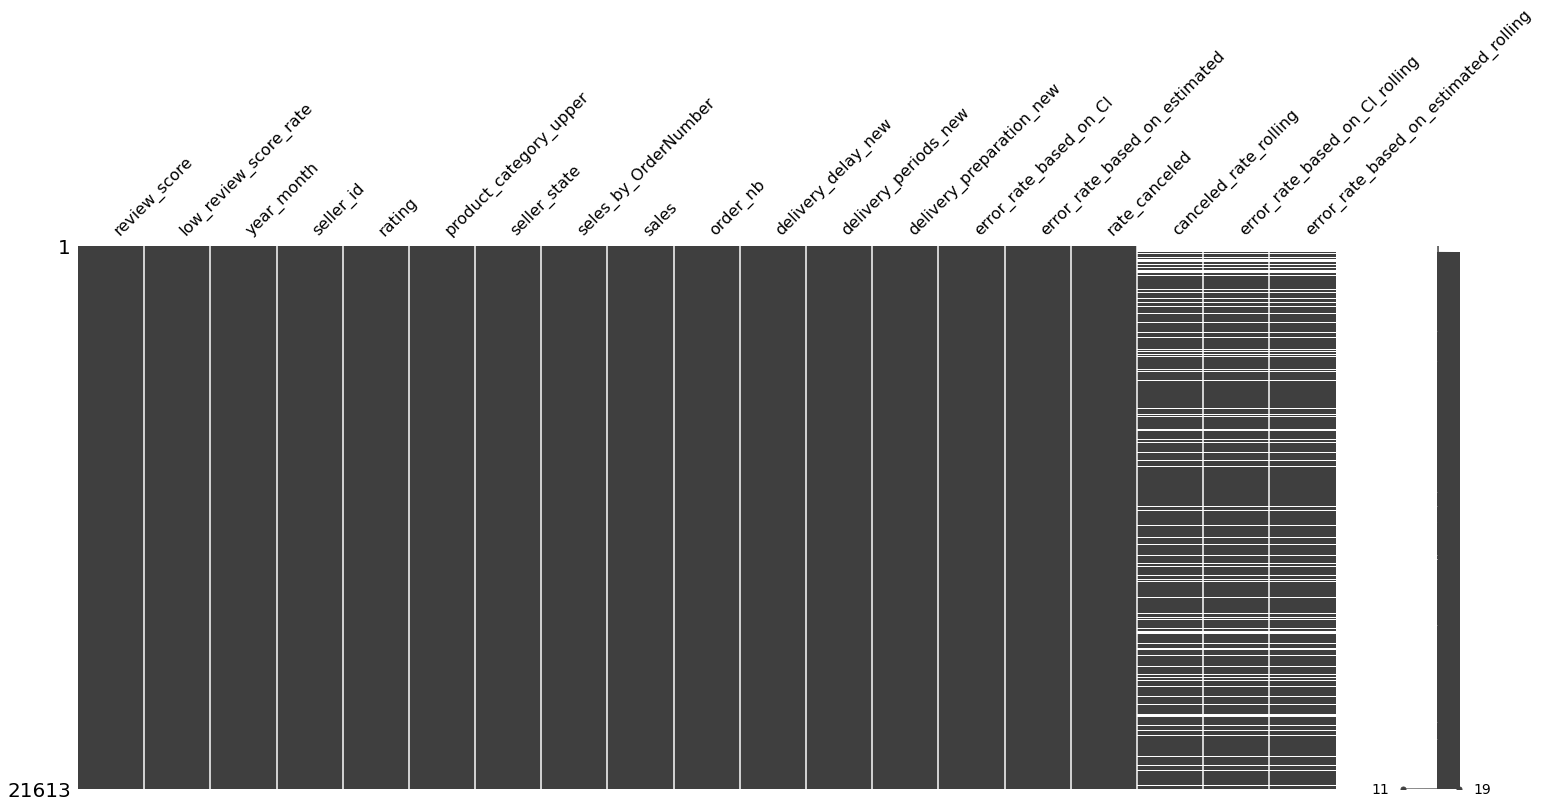

In [5]:
ms.missingno.matrix(df)

## 범주형, 연속형 컬럼 분리 및 데이터타입 변경

In [6]:
len(df.columns)

19

In [7]:
df.columns

Index(['review_score', 'low_review_score_rate', 'year_month', 'seller_id',
       'rating', 'product_category_upper', 'seller_state',
       'seles_by_OrderNumber', 'sales', 'order_nb', 'delivery_delay_new',
       'delivery_periods_new', 'delivery_preparation_new',
       'error_rate_based_on_CI', 'error_rate_based_on_estimated',
       'rate_canceled', 'canceled_rate_rolling',
       'error_rate_based_on_CI_rolling',
       'error_rate_based_on_estimated_rolling'],
      dtype='object')

In [8]:
cat_col = ["product_category_upper","rating","seller_state"] #year_month 제외, #seller_id
num_col = ["sales","order_nb","seles_by_OrderNumber","delivery_delay_new","delivery_periods_new","delivery_preparation_new",
           "error_rate_based_on_CI","error_rate_based_on_estimated","rate_canceled",
           "error_rate_based_on_CI_rolling","error_rate_based_on_estimated_rolling","canceled_rate_rolling"]
y_col = ["low_review_score_rate"]
# y_col = ["review_score"]

df_model = df[y_col + num_col + cat_col].copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   review_score                           21613 non-null  float64       
 1   low_review_score_rate                  21613 non-null  float64       
 2   year_month                             21613 non-null  datetime64[ns]
 3   seller_id                              21613 non-null  object        
 4   rating                                 21613 non-null  int64         
 5   product_category_upper                 21613 non-null  object        
 6   seller_state                           21613 non-null  object        
 7   seles_by_OrderNumber                   21607 non-null  float64       
 8   sales                                  21607 non-null  float64       
 9   order_nb                               21607 non-null  float6

In [11]:
df_model[cat_col] = df[cat_col].astype("category")
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   low_review_score_rate                  21613 non-null  float64 
 1   sales                                  21607 non-null  float64 
 2   order_nb                               21607 non-null  float64 
 3   seles_by_OrderNumber                   21607 non-null  float64 
 4   delivery_delay_new                     21607 non-null  float64 
 5   delivery_periods_new                   21607 non-null  float64 
 6   delivery_preparation_new               21607 non-null  float64 
 7   error_rate_based_on_CI                 21607 non-null  float64 
 8   error_rate_based_on_estimated          21607 non-null  float64 
 9   rate_canceled                          21613 non-null  float64 
 10  error_rate_based_on_CI_rolling         17865 non-null  flo

In [39]:
df.isnull().sum()

review_score                                0
low_review_score_rate                       0
year_month                                  0
seller_id                                   0
rating                                      0
product_category_upper                      0
seller_state                                0
seles_by_OrderNumber                        6
sales                                       6
order_nb                                    6
delivery_delay                              6
delivery_periods                            6
delivery_preparation                        6
error_rate_based_on_CI                      6
error_rate_based_on_estimated               6
rate_canceled                               0
canceled_rate_rolling                    3747
error_rate_based_on_CI_rolling           3748
error_rate_based_on_estimated_rolling    3748
dtype: int64

0         20.0
1          0.0
2          0.0
3         50.0
4          0.0
         ...  
21608    100.0
21609    100.0
21610    100.0
21611    100.0
21612      0.0
Name: low_review_score_rate, Length: 21613, dtype: float64

In [29]:
X = df_model.drop(y_col,axis=1)
# y = df_model[y_col].tolist()
y = df_model.low_review_score_rate.copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=0)

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

categorical_encoder = OneHotEncoder(handle_unknown='ignore')
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessing = ColumnTransformer(
    [('cat', categorical_encoder, cat_col),
     ('num', numerical_pipe, num_col)])

rf = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', LGBMRegressor(random_state=0))
])
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['product_category_upper',
                                                   'rating', 'seller_state']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['sales', 'order_nb',
                                                   'seles_by_OrderNumber',
                                                   'delivery_delay_new',
                                                   'delivery_periods_new',
                                                   'delivery_preparation_new',
                                                   'error_rate_based_o

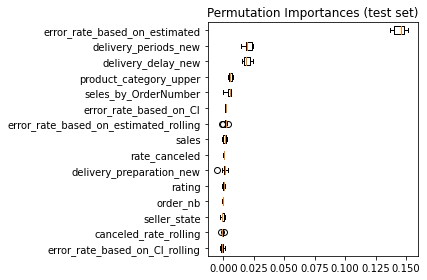

In [39]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

## 컬럼별 인코딩

In [43]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [44]:
def proprecess(x_train, x_test):
    tmp_x_train = x_train.reset_index(drop=True).copy()
    tmp_x_test = x_test.reset_index(drop=True).copy()
    
    #num_column scaling
    scaler = StandardScaler()
    tmp_x_train[num_col] = scaler.fit_transform(tmp_x_train[num_col])
    tmp_x_test[num_col] = scaler.fit_transform(tmp_x_test[num_col])
    
    #cat_column Onehot
    ohe = OneHotEncoder(sparse = False) #원핫인코딩은 기본적으로 matrix를 반환해주는데 우리가 필요한 것은 array이므로 False
    x_all = pd.concat([tmp_x_train[cat_col],tmp_x_test[cat_col]], axis = 0)
    new_x_all = ohe.fit_transform(x_all)
    
    ohe_columns = []
    for i,cat in enumerate(ohe.categories_):
#         ohe_columns +=cat_col[i]+'_'+cat.tolist()
        ohe_columns +=(cat_col[i]+"_"+cat).tolist()
        
#     for cat in ohe.categories_:
#         ohe_columns +=cat.tolist()
        
    new_x_all = pd.DataFrame(new_x_all, columns = ohe_columns)
    
    new_x_train_cat = new_x_all.iloc[:tmp_x_train.shape[0], :]    
    new_x_test_cat =  new_x_all.iloc[tmp_x_train.shape[0]:, :]  
    
    new_x_train_cat = new_x_train_cat.reset_index(drop=True)  
    new_x_test_cat  = new_x_test_cat.reset_index(drop=True) 
    
    tmp_x_train = tmp_x_train.drop(columns=cat_col) 
    tmp_x_test  = tmp_x_test.drop(columns=cat_col)  
    
    tmp_x_train = pd.concat([tmp_x_train, new_x_train_cat], axis=1) 
    tmp_x_test = pd.concat([tmp_x_test, new_x_test_cat], axis=1)  
    return tmp_x_train, tmp_x_test

X_train, X_test = proprecess(X_train, X_test)

In [45]:
X_train.isnull().sum()

sales                                        0
order_nb                                     0
seles_by_OrderNumber                         0
delivery_delay                               0
delivery_periods                             0
delivery_preparation                         0
error_rate_based_on_CI                       0
error_rate_based_on_estimated                0
rate_canceled                                0
error_rate_based_on_CI_rolling            1872
error_rate_based_on_estimated_rolling     1872
canceled_rate_rolling                     1871
product_category_upper_agro                  0
product_category_upper_auto                  0
product_category_upper_baby                  0
product_category_upper_beauty                0
product_category_upper_book                  0
product_category_upper_construction          0
product_category_upper_culture               0
product_category_upper_electronics           0
product_category_upper_fashion               0
product_categ

In [46]:
# x_train = x_train.drop("year_month",axis = 1)
# x_test = x_test.drop("year_month",axis = 1)

In [1]:
from sklearn.linear_model   import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble       import RandomForestRegressor
from xgboost                import XGBRegressor
from lightgbm               import LGBMRegressor
from sklearn.metrics        import mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble       import ExtraTreesRegressor
from sklearn.tree           import ExtraTreeRegressor
from sklearn.tree           import DecisionTreeRegressor
from sklearn.ensemble       import GradientBoostingRegressor
from sklearn.ensemble       import BaggingRegressor
from sklearn.ensemble       import AdaBoostRegressor

In [48]:
X_train.columns

Index(['sales', 'order_nb', 'seles_by_OrderNumber', 'delivery_delay',
       'delivery_periods', 'delivery_preparation', 'error_rate_based_on_CI',
       'error_rate_based_on_estimated', 'rate_canceled',
       'error_rate_based_on_CI_rolling',
       'error_rate_based_on_estimated_rolling', 'canceled_rate_rolling',
       'product_category_upper_agro', 'product_category_upper_auto',
       'product_category_upper_baby', 'product_category_upper_beauty',
       'product_category_upper_book', 'product_category_upper_construction',
       'product_category_upper_culture', 'product_category_upper_electronics',
       'product_category_upper_fashion', 'product_category_upper_food_drink',
       'product_category_upper_furniture', 'product_category_upper_games',
       'product_category_upper_garden_tools',
       'product_category_upper_home_appliances',
       'product_category_upper_home_living', 'product_category_upper_others',
       'product_category_upper_pet', 'product_category_upper

In [33]:
columns = X_train.columns
columns[select.get_support()]

Index(['sales', 'order_nb', 'seles_by_OrderNumber', 'delivery_delay',
       'delivery_periods', 'delivery_preparation',
       'error_rate_based_on_estimated', 'error_rate_based_on_CI_rolling',
       'error_rate_based_on_estimated_rolling'],
      dtype='object')

<AxesSubplot:xlabel='order_nb', ylabel='low_review_score_rate'>

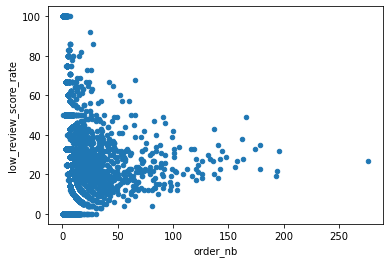

In [21]:
col1 = "low_review_score_rate"
col2 = "order_nb"
df[[col1,col2]].plot.scatter(x = col2,y=col1)

In [32]:
select.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

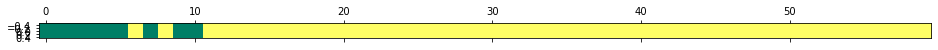

In [22]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(LGBMRegressor(random_state=0, n_jobs=-1),threshold='mean')
select.fit(X_train, y_train)
X_train_sl = select.transform(X_train)
look = select.get_support()

plt.matshow(look.reshape(1,-1), cmap = 'summer_r')

In [52]:
models = [
#     ['Linear Regression', LinearRegression(n_jobs=-1)], 
#     ['MultiLayerPerceptron', MLPRegressor(random_state=0)],  
#     ['RandomForest', RandomForestRegressor(random_state=0,n_jobs=-1)],
    ['XGBoost', XGBRegressor(random_state=0, n_jobs=-1)],
    ['LightGBM', LGBMRegressor(random_state=0,n_jobs=-1)],
#     ['ExtraTrees', ExtraTreesRegressor(random_state=0,n_jobs=-1)],
#     ['ExtraTree', ExtraTreeRegressor(random_state=0)],
#     ["Decision", DecisionTreeRegressor(random_state=0)],
#     ['GradientBoosting', GradientBoostingRegressor(random_state=0)],
#     ['Bagging', BaggingRegressor(random_state=0,n_jobs=-1)],
#     ['AdaBoost', AdaBoostRegressor(random_state=0)],
    ]
best_loss = np.inf

for i, (name, model) in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    current_loss = mean_squared_error(y_test, y_pred) 
    
    if current_loss < best_loss:   
        best_loss  = current_loss    
        best_model = [i, name]  
        
    print(f'{name} Model Mean Absolute Error: {current_loss}')
    
print('*'*65)
print(f'Best Model: {best_model[-1]}, Mean Absolute Error: {best_loss}')
print('*'*65)

XGBoost Model Mean Absolute Error: 1577.8216075914768
LightGBM Model Mean Absolute Error: 889.7656082780916
*****************************************************************
Best Model: LightGBM, Mean Absolute Error: 889.7656082780916
*****************************************************************


In [ ]:
model.

In [53]:
y_result.round()

NameError: name 'y_result' is not defined

In [146]:
y_result["diff_score"] = y_result.review_score - y_result.y_pred

<AxesSubplot:>

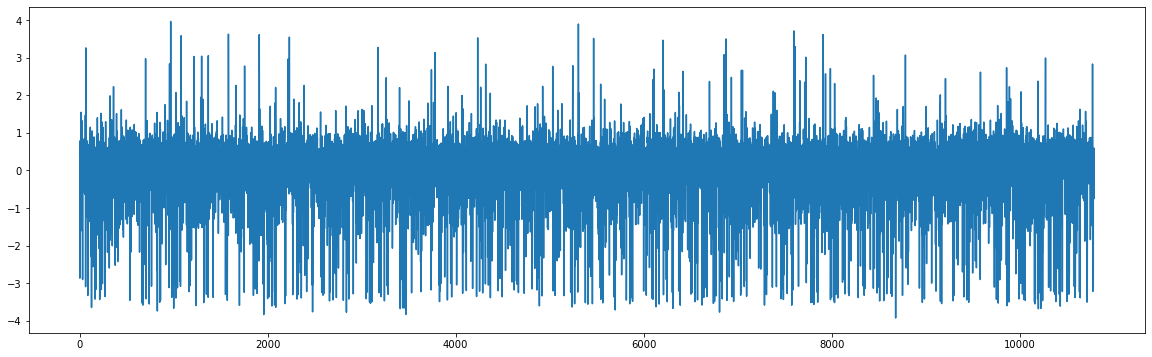

In [152]:
y_result["diff_score"].reset_index(drop=True).plot(figsize = (20,6))

<AxesSubplot:>

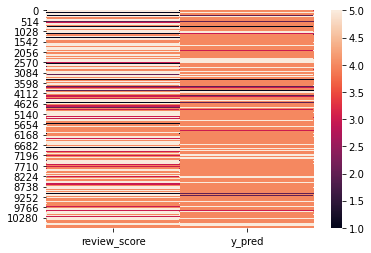

In [142]:
# sns.jointplot(x = y_test.low_review_score_rate, y = y_test.y_pred)
sns.heatmap(data = y_result.reset_index(drop=True).round())

# 모델 생성

## 선형회귀

In [109]:
import statsmodels.api as sm

In [ ]:
sm.OLS()

# 보류

In [31]:
from scipy.stats import shapiro
from scipy.stats import anderson

k2, p = stats.normaltest(df_train["year"])

In [74]:
col_cat

['seller_id',
 'product_category_upper',
 'product_category_name_english',
 'month',
 'year',
 'rating',
 'year_month']

In [97]:
df_train.groupby("month").seller_id.count().sort_values()

month
6      744
7      869
8      998
9     1039
10    1076
12    1205
11    1388
1     1697
2     1919
3     2152
4     2349
5     2426
Name: seller_id, dtype: int64

In [71]:
# shapiro(df_train.loc[df_train.year==2017,"review_score"])
# shapiro(df_train.loc[df_train.month==5,"review_score"])
stats.normaltest(df_train.loc[df_train.month==5,"review_score"])
# stats.normaltest(df_train.loc[df_train.year==2017,"review_score"])

NormaltestResult(statistic=832.6587054991858, pvalue=1.5504560017307204e-181)

In [18]:
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols

In [19]:
fit = ols('year ~ review_score',data=df_train).fit()
 
## 이론상 잔차값 계산
sqrt_mse = np.sqrt(fit.mse_resid) ## square root of mse
std_res = fit.resid/sqrt_mse ## studentized residual
 
def empirical_dist(x,samples):
    ## x에 대응하는 경험 분포 값을 계산하는 함수
    count = 0
    for s in samples:
        if s <= x:
            count += 1
    return count/len(samples)
 
distance = [] ## 경험 분포 함수값과 정규분포의 누적함수 값의 차이를 담는다.
for r in std_res:
    diff = abs(empirical_dist(r,std_res)-norm.cdf(r))
    distance.append(diff)
 
## K-S 검정 통계량
ks_stat = max(distance)

In [21]:
std_res

0       -0.849932
1       -0.848539
2       -0.813716
3       -0.864016
4       -0.877094
           ...   
22046    1.198939
22050    1.214029
22051    1.168759
22054    1.214029
22058    1.202711
Length: 17862, dtype: float64

In [104]:
from scipy.stats import shapiro
s = df_train[col_cat[0]].unique().tolist()[0]
shapiro(df_train.loc[df_train[col_cat[0]]==s,"review_score"])
# train[var]

ShapiroResult(statistic=0.9406018257141113, pvalue=0.3253905177116394)

In [52]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def preprocess(trainset,testset, col_cat, col_num):
    tmp_train = trainset.copy()
    tmp_test = testset.copy()
    
    #reset index
    tmp_train = tmp_train.reset_index(drop = True)
    tmp_test = tmp_test.reset_index(drop = True)
    
    #col_num scaling
    scaler = StandardScaler()
    tmp_train[col_num] = scaler.fit_transform(tmp_train[col_num])
    tmp_test[col_num] = scaler.transform(tmp_test[col_num])
    
    #cat_col OneHot
    onehot = OneHotEncoder(sparse=False)
    tmp_train[col_cat] = onehot.fit_transform(tmp_train[col_cat])
    tmp_test[col_cat] = onehot.transform(tmp_test[col_cat])
    
    return tmp_train[col_cat]
    

In [69]:
# preprocess(trainset = df_train,testset = df_test, col_cat = col_cat, col_num = col_num)

tmp_train = df_train.copy()
tmp_test = df_test.copy()

#reset index
tmp_train = tmp_train.reset_index(drop = True)
tmp_test = tmp_test.reset_index(drop = True)

#col_num scaling
scaler = StandardScaler()
tmp_train[col_num] = scaler.fit_transform(tmp_train[col_num])
tmp_test[col_num] = scaler.transform(tmp_test[col_num])

# #cat_col OneHot
onehot = OneHotEncoder(sparse=False)
onehot.fit_transform(tmp_train[col_cat])
# tmp_test[col_cat] = onehot.transform(tmp_test[col_cat])
    

(17862, 2435)

In [75]:
pd.get_dummies(tmp_train[col_cat])

,seller_id_0015a82c2db000af6aaaf3ae2ecb0532,seller_id_001cca7ae9ae17fb1caed9dfb1094831,seller_id_002100f778ceb8431b7a1020ff7ab48f,seller_id_004c9cd9d87a3c30c522c48c4fc07416,seller_id_00720abe85ba0859807595bbf045a33b,seller_id_00ab3eff1b5192e5f1a63bcecfee11c8,seller_id_00d8b143d12632bad99c0ad66ad52825,seller_id_00ee68308b45bc5e2660cd833c3f81cc,seller_id_00fc707aaaad2d31347cf883cd2dfe10,seller_id_010543a62bd80aa422851e79a3bc7540,...,product_category_name_english_security_and_services,product_category_name_english_signaling_and_security,product_category_name_english_small_appliances,product_category_name_english_small_appliances_home_oven_and_coffee,product_category_name_english_sports_leisure,product_category_name_english_stationery,product_category_name_english_tablets_printing_image,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
